# Repo cloning, TBD!!!, change folder locations

In [11]:
!git clone https://BatyshchevKirill:<PAT>@github.com/BatyshchevKirill/text-detoxification.git

Cloning into 'text-detoxification'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 53 (delta 14), reused 46 (delta 13), pack-reused 5
Receiving objects: 100% (53/53), 42.35 MiB | 34.42 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [12]:
import os
os.chdir('/content/text-detoxification')

# Data exploration

In [13]:
!unzip /content/text-detoxification/data/raw/filtered_paranmt.zip -d /content/text-detoxification/data/raw/
# !unzip ../data/raw/filtered_paranmt.zip -d ../data/raw/

Archive:  /content/text-detoxification/data/raw/filtered_paranmt.zip
replace /content/text-detoxification/data/raw/filtered.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [40]:
import pandas as pd

df = pd.read_csv('/content/text-detoxification/data/raw/filtered.tsv', sep='\t')
# df = pd.read_csv('../data/raw/filtered.tsv', sep='\t')
df.set_index(df.columns[0], inplace=True)
df.index.name = None

df.head(10)

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.720482,0.187500,0.963680,0.148710
8,"Briggs, what the hell's happening?","Briggs, what the hell is going on?",0.920373,0.000000,0.159096,0.841071
9,"Another one simply had no clue what to do, so ...","another simply didn't know what to do, so when...",0.877540,0.101695,0.055371,0.930472


In [41]:
df['toxic'] = df.apply(
    lambda row: row['reference']
    if row['ref_tox'] > row['trn_tox']
    else row['translation'],
    axis=1)
df['detoxed'] = df.apply(
    lambda row: row['reference']
    if row['ref_tox'] <= row['trn_tox']
    else row['translation'],
    axis=1)
df['tox_lvl'] = df.apply(
    lambda row: row['ref_tox']
    if row['ref_tox'] > row['trn_tox']
    else row['trn_tox'],
    axis=1)
df['dtx_lvl'] = df.apply(
    lambda row: row['ref_tox']
    if row['ref_tox'] <= row['trn_tox']
    else row['trn_tox'],
    axis=1)
df.drop(['reference', 'translation', 'ref_tox', 'trn_tox'], inplace=True, axis=1)
df['tox_diff'] = df.tox_lvl - df.dtx_lvl


df.head(10)

,similarity,lenght_diff,toxic,detoxed,tox_lvl,dtx_lvl,tox_diff
0,0.785171,0.010309,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195,0.967788
1,0.749687,0.071429,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473,0.933567
2,0.919051,0.268293,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313,0.771755
3,0.664333,0.309524,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362,0.940853
4,0.726639,0.181818,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402,0.989946
5,0.703185,0.206522,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.950956,0.035846,0.915109
6,0.618866,0.230769,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.999492,0.000131,0.999361
7,0.720482,0.187500,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.963680,0.148710,0.814971
8,0.920373,0.000000,"Briggs, what the hell is going on?","Briggs, what the hell's happening?",0.841071,0.159096,0.681975
9,0.877540,0.101695,"another simply didn't know what to do, so when...","Another one simply had no clue what to do, so ...",0.930472,0.055371,0.875101


In [42]:
df.describe()

,similarity,lenght_diff,tox_lvl,dtx_lvl,tox_diff
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.940260,0.035601,0.904659
std,0.092695,0.108057,0.100831,0.079399,0.126501
min,0.600001,0.000000,0.500139,0.000033,0.500002
25%,0.681105,0.066667,0.940145,0.000164,0.870397
50%,0.754439,0.141791,0.983842,0.003456,0.963144
75%,0.831244,0.238095,0.997519,0.027242,0.992266
max,0.950000,0.400000,0.999730,0.499494,0.999681


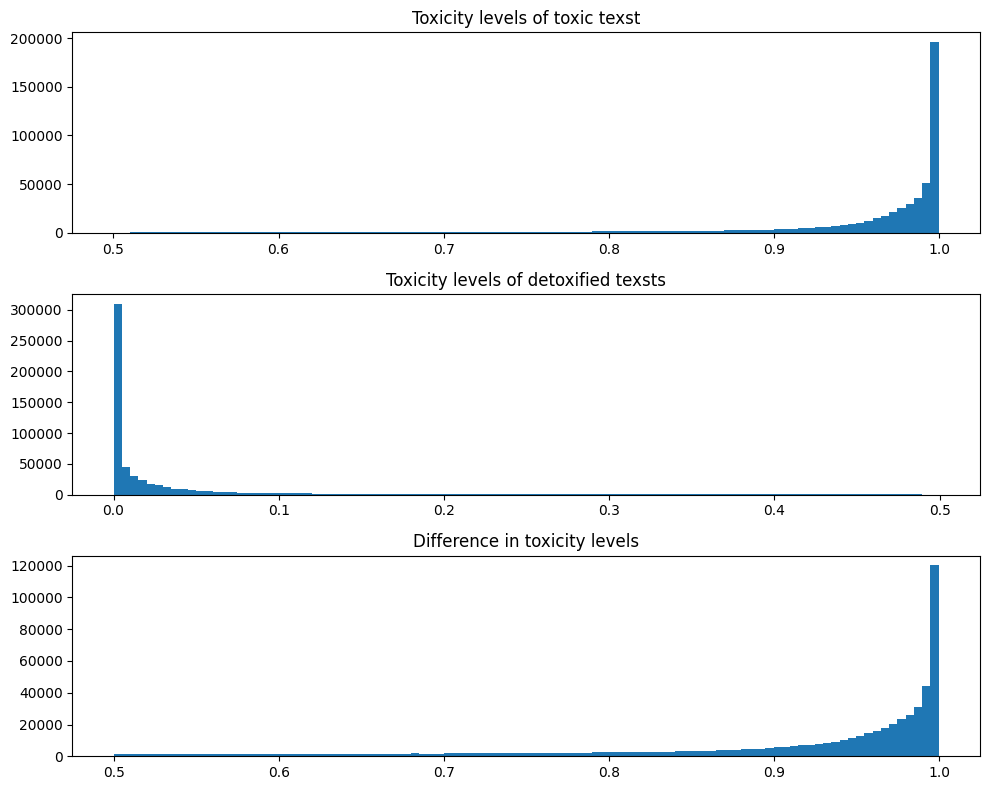

In [43]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].hist(df.tox_lvl, bins=100)
axs[0].set_title('Toxicity levels of toxic texst')

axs[1].hist(df.dtx_lvl, bins=100)
axs[1].set_title('Toxicity levels of detoxified texsts')

axs[2].hist(df.tox_diff, bins=100)
axs[2].set_title('Difference in toxicity levels')

plt.tight_layout()

plt.show()

As we can see, most of the data was very toxic initially, and the translation decreased the toxicity level significantly. So, we can drop some data that was initially very toxic or remained toxic after translation without losing much data

Text lengths

Toxic text lengths: 
count    577777.000000
mean         52.538590
std          37.323531
min           2.000000
25%          28.000000
50%          43.000000
75%          66.000000
max        1401.000000
Name: toxic, dtype: float64
Detoxified text lengths: 
count    577777.000000
mean         51.160219
std          37.381603
min           3.000000
25%          26.000000
50%          41.000000
75%          65.000000
max         969.000000
Name: detoxed, dtype: float64


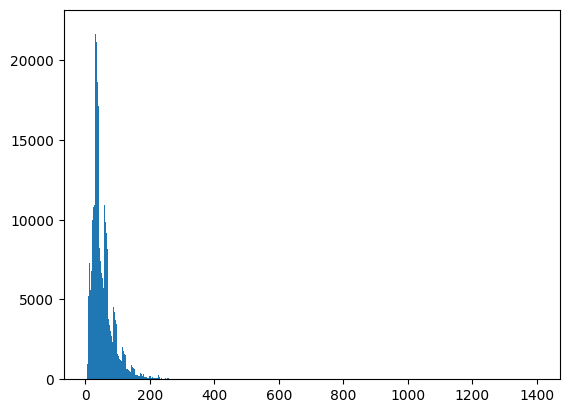

In [72]:
print('Toxic text lengths: ')
print(df["toxic"].str.len().describe())
print('Detoxified text lengths: ')
print(df["detoxed"].str.len().describe())
plt.hist(df["toxic"].str.len(), bins=1000)
plt.show()

Most of the sentences are shorter than 200, so we would not lose much data if we drop the too long ones

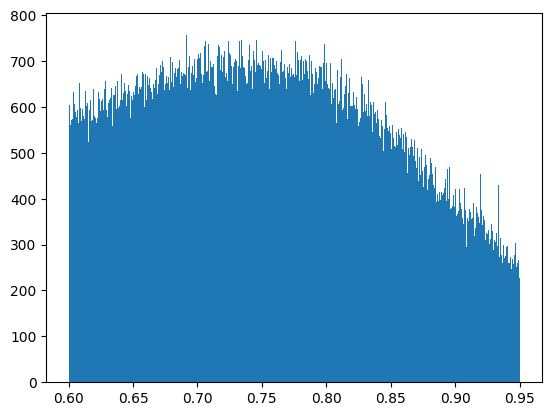

In [73]:
plt.hist(df.similarity, bins=1000)
plt.show()

More or less even

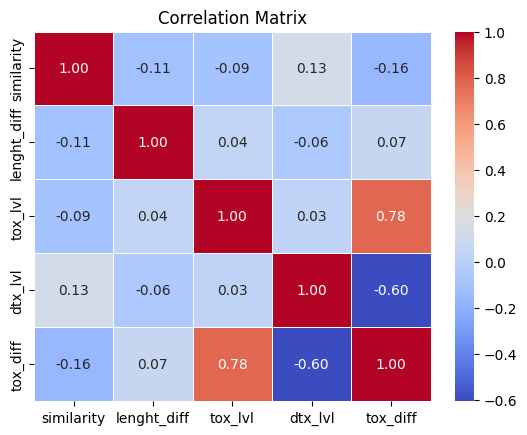

In [81]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

Almost independent

In [83]:
import pandas as pd
from collections import Counter


# Separate toxic and detoxified texts
toxic_texts = df['toxic'].tolist()
detoxified_texts = df['detoxed'].tolist()

toxic_words = ' '.join(toxic_texts).split()
detoxified_words = ' '.join(detoxified_texts).split()

toxic_word_counts = Counter(toxic_words)
detoxified_word_counts = Counter(detoxified_words)

word_diff = {}
for word, count in toxic_word_counts.items():
    if word in detoxified_word_counts:
        detoxified_count = detoxified_word_counts[word]
        if count > 2 * detoxified_count:
            word_diff[word] = count - detoxified_count

sorted_word_diff = sorted(word_diff.items(), key=lambda x: x[1], reverse=True)

top_words = sorted_word_diff[:20]
for word, diff in top_words:
    print(f'Word: {word}, Frequency Difference: {diff}')


Word: fucking, Frequency Difference: 28779
Word: fuck, Frequency Difference: 14178
Word: damn, Frequency Difference: 13253
Word: shit, Frequency Difference: 11686
Word: kill, Frequency Difference: 11133
Word: hell, Frequency Difference: 8022
Word: shit., Frequency Difference: 7779
Word: stupid, Frequency Difference: 5512
Word: ass, Frequency Difference: 4994
Word: goddamn, Frequency Difference: 4709
Word: fucked, Frequency Difference: 4667
Word: shut, Frequency Difference: 4651
Word: sex, Frequency Difference: 4423
Word: shit,, Frequency Difference: 4083
Word: shoot, Frequency Difference: 3813
Word: fuckin', Frequency Difference: 3336
Word: Damn, Frequency Difference: 2385
Word: die., Frequency Difference: 2208
Word: Get, Frequency Difference: 2195
Word: Shut, Frequency Difference: 2154
